In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the Excel file
file_path = 'CDS USD SR 5Y D14 COPR 2000-2018.xlsx'
# Since we don't know the structure of the Excel, we'll try to load the first sheet
data1 = pd.read_excel(file_path, sheet_name=0)

# Assuming the structure of the Excel file has a 'Date' column and a 'Spread' column
# We'll format the date and plot the time series for each company

# First, let's look at the data to understand its structure
data1.head()

,AIG CDS USD SR 5Y D14 Corp,Unnamed: 1,GS CDS USD SR 5Y D14 Corp,Unnamed: 3,JPMCC CDS USD SR 5Y D14 Corp,Unnamed: 5,BOFA CDS USD SR 5Y D14 Corp,Unnamed: 7,CINC CDS USD SR 5Y D14 Corp,Unnamed: 9,MS CDS USD SR 5Y D14 Corp,Unnamed: 11
0,Date,Last Price,Date,Last Price,Date,Last Price,Date,Last Price,Date,Last Price,Date,Last Price
1,2018-03-08 00:00:00,65.81,2017-12-29 00:00:00,52.474,2017-12-29 00:00:00,37.654,2017-12-29 00:00:00,37.707,2017-12-29 00:00:00,39.797,2017-12-29 00:00:00,49.669
2,2018-03-07 00:00:00,66.359,2017-12-28 00:00:00,52.257,2017-12-28 00:00:00,37.882,2017-12-28 00:00:00,37.637,2017-12-28 00:00:00,39.88,2017-12-28 00:00:00,50.098
3,2018-03-06 00:00:00,67.008,2017-12-27 00:00:00,51.775,2017-12-27 00:00:00,38.456,2017-12-27 00:00:00,37.495,2017-12-27 00:00:00,40.246,2017-12-27 00:00:00,49.297
4,2018-03-05 00:00:00,67.096,2017-12-26 00:00:00,52.294,2017-12-26 00:00:00,37.936,2017-12-26 00:00:00,38.11,2017-12-26 00:00:00,40.451,2017-12-26 00:00:00,49.783


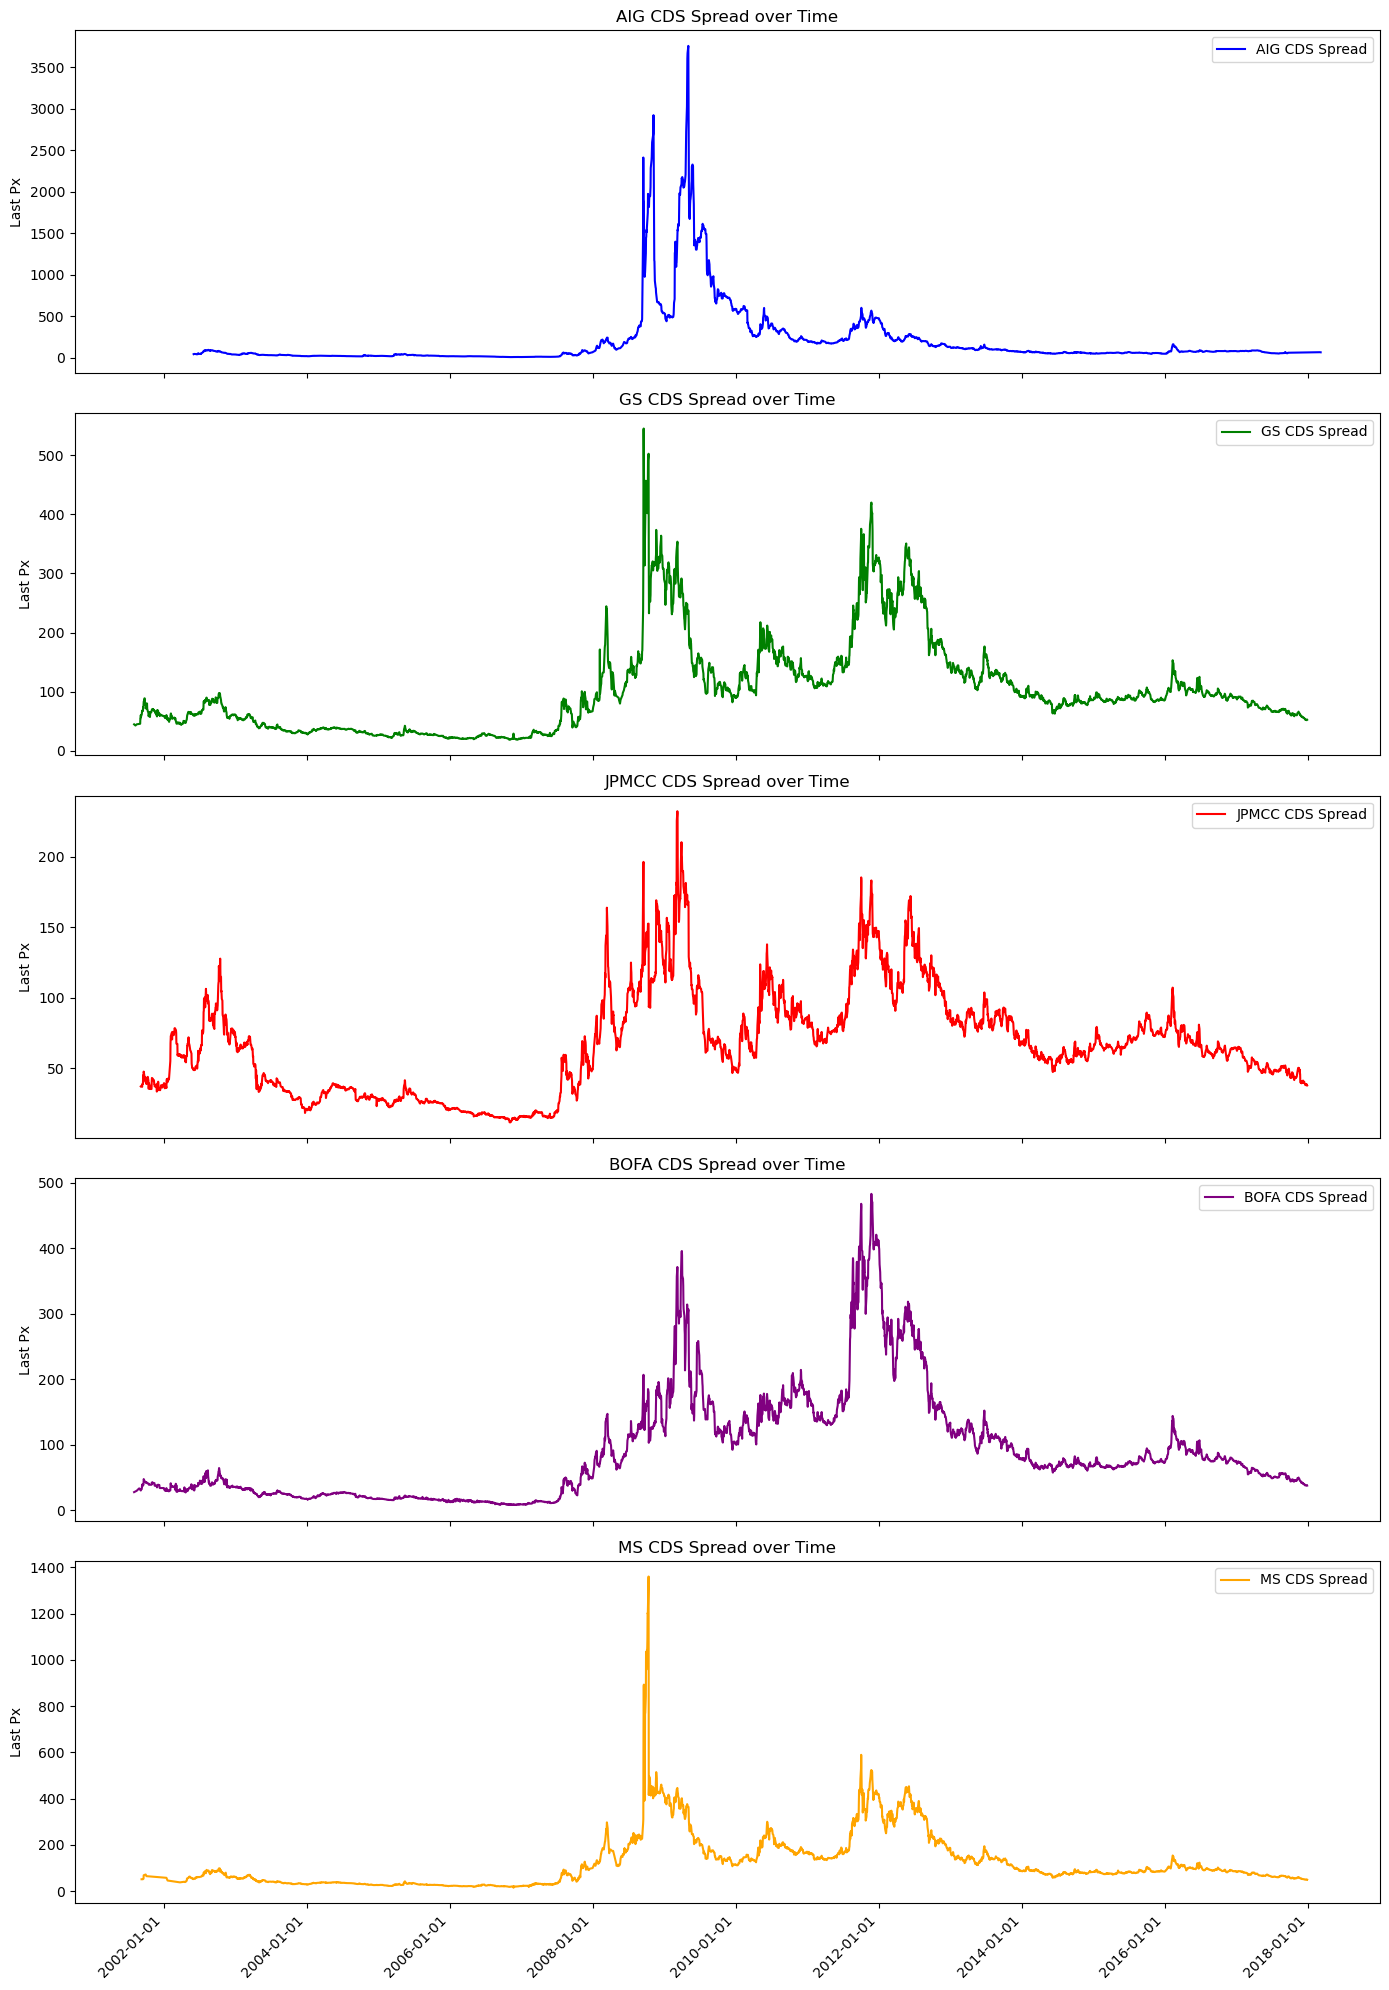

In [8]:
# The structure of the Excel file has been determined. Now let's process and plot the data
# We will remove the first row which contains repeated headers and convert dates to datetime objects

# Dropping the first row with duplicate headers
data1 = data1.drop(0)

# Setting up the plot - we'll plot each company in a separate subplot
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 20), sharex=True)

# Defining a common date format for the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')

# A list of column names for companies to iterate through
companies = ['AIG', 'GS', 'JPMCC', 'BOFA', 'MS']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, company in enumerate(companies):
    # Each company has its date in one column and price in the next, so we find the index of date column
    date_col_index = data1.columns.get_loc(f"{company} CDS USD SR 5Y D14 Corp")
    price_col_index = date_col_index + 1
    
    # Extracting date and price series for the company
    company_dates = pd.to_datetime(data1.iloc[:, date_col_index])
    company_prices = pd.to_numeric(data1.iloc[:, price_col_index], errors='coerce')
    
    # Plotting the time series data
    axes[i].plot(company_dates, company_prices, color=colors[i], label=f"{company} CDS Spread")
    axes[i].set_title(f"{company} CDS Spread over Time")
    axes[i].set_ylabel('Last Px')
    axes[i].legend()
    axes[i].xaxis.set_major_formatter(date_format)

# Rotate date labels for better visibility
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


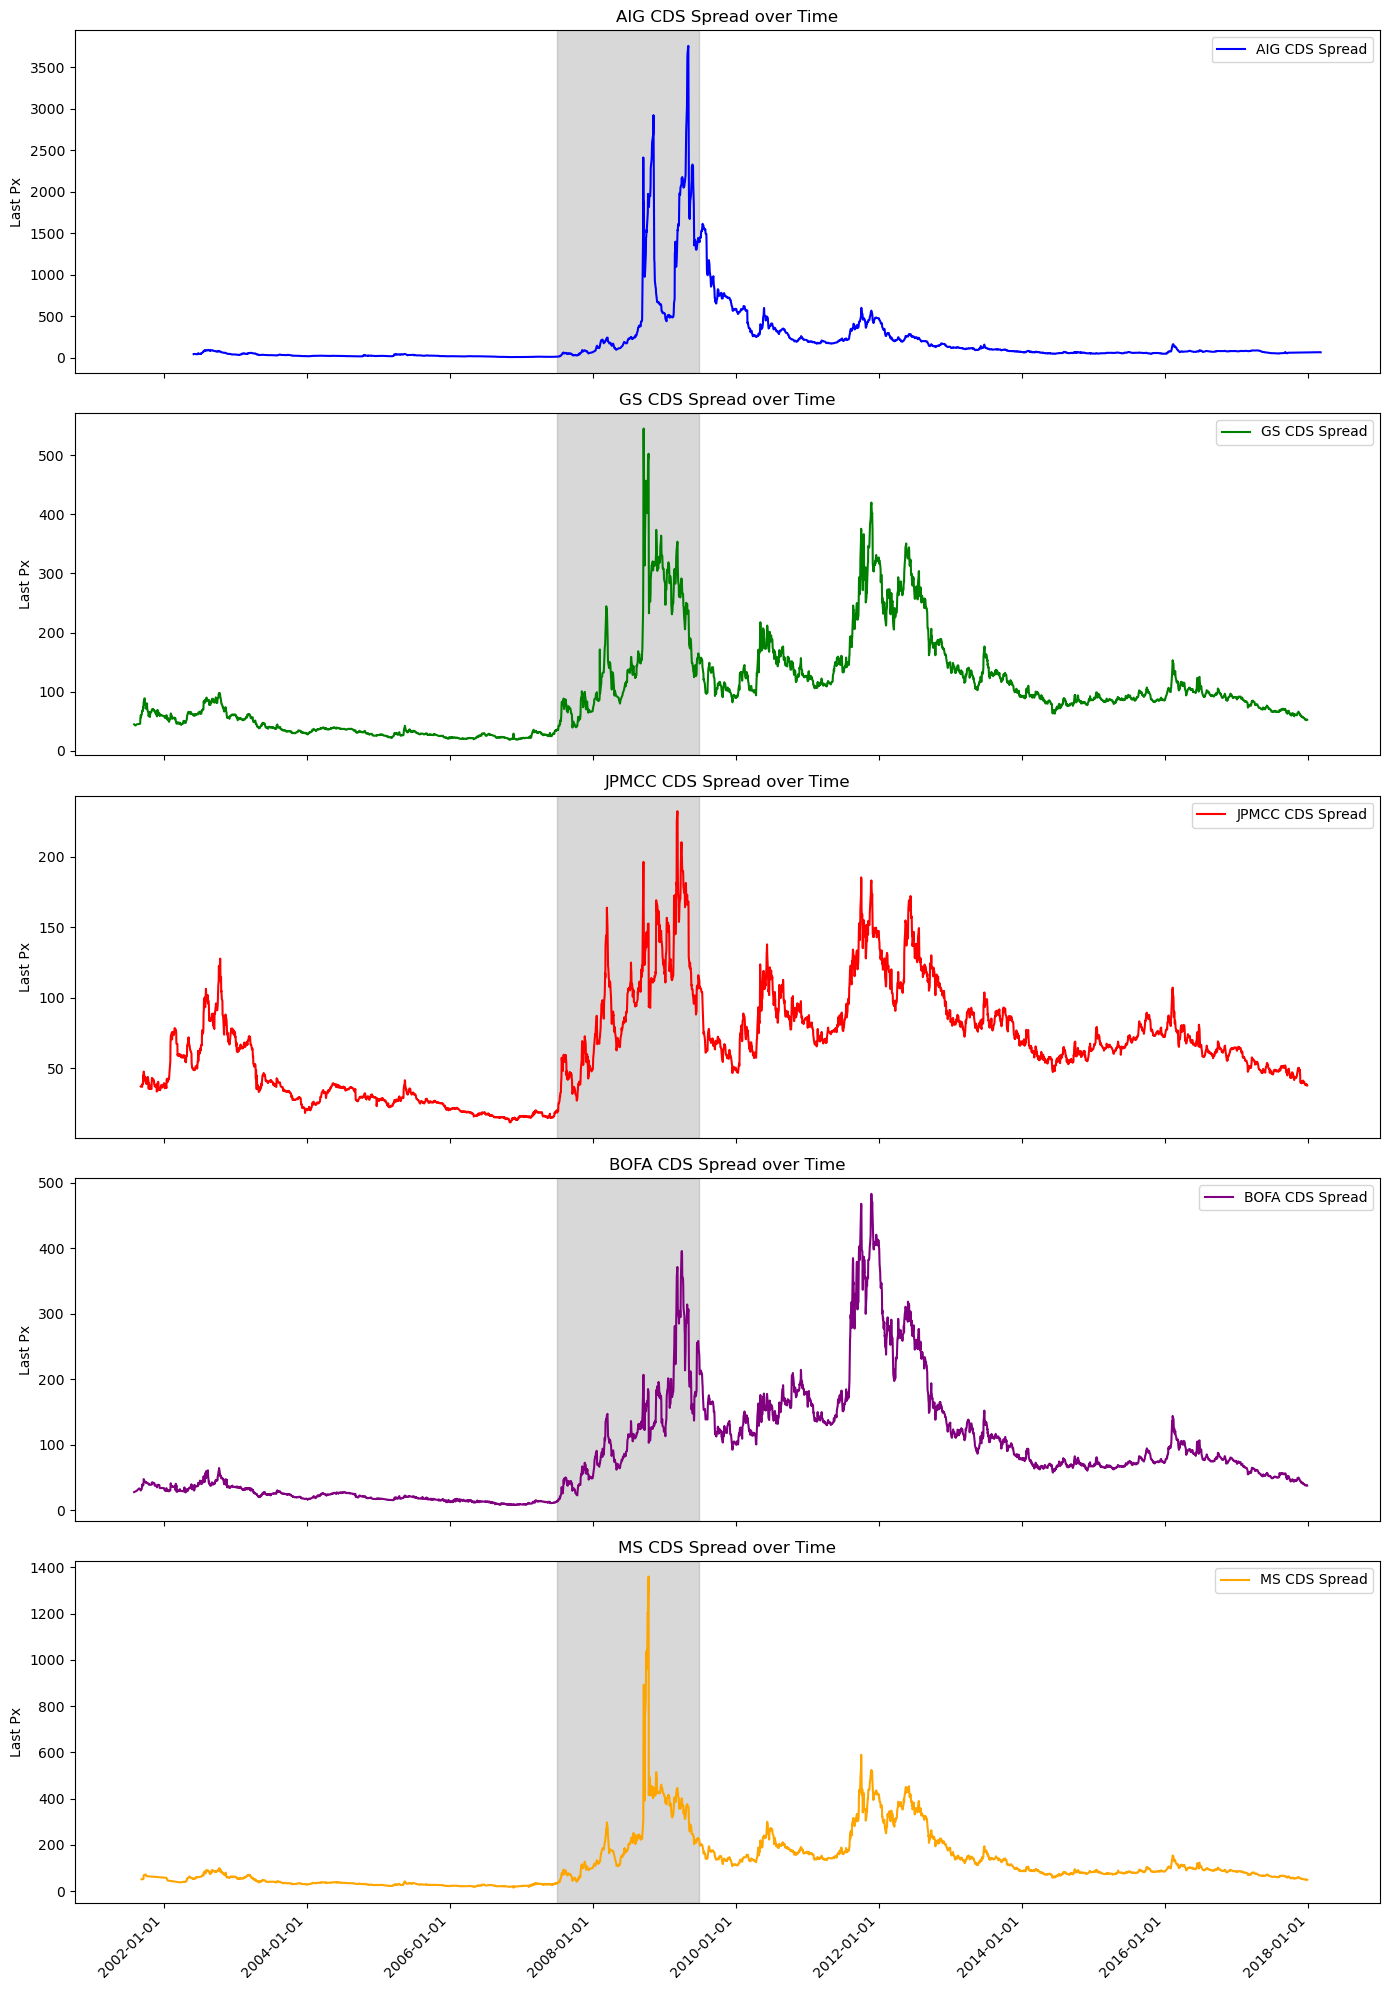

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# 设置图表
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 20), sharex=True)
date_format = mdates.DateFormatter('%Y-%m-%d')

companies = ['AIG', 'GS', 'JPMCC', 'BOFA', 'MS']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, company in enumerate(companies):
    date_col_index = data1.columns.get_loc(f"{company} CDS USD SR 5Y D14 Corp")
    price_col_index = date_col_index + 1
    
    company_dates = pd.to_datetime(data1.iloc[:, date_col_index])
    company_prices = pd.to_numeric(data1.iloc[:, price_col_index], errors='coerce')
    
    axes[i].plot(company_dates, company_prices, color=colors[i], label=f"{company} CDS Spread")
    axes[i].set_title(f"{company} CDS Spread over Time")
    axes[i].set_ylabel('Last Px')
    axes[i].legend()
    axes[i].xaxis.set_major_formatter(date_format)

    # 标记2008年金融危机期间
    crisis_start = pd.to_datetime('2007-07-01')
    crisis_end = pd.to_datetime('2009-06-30')
    axes[i].axvspan(crisis_start, crisis_end, color='grey', alpha=0.3)

for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


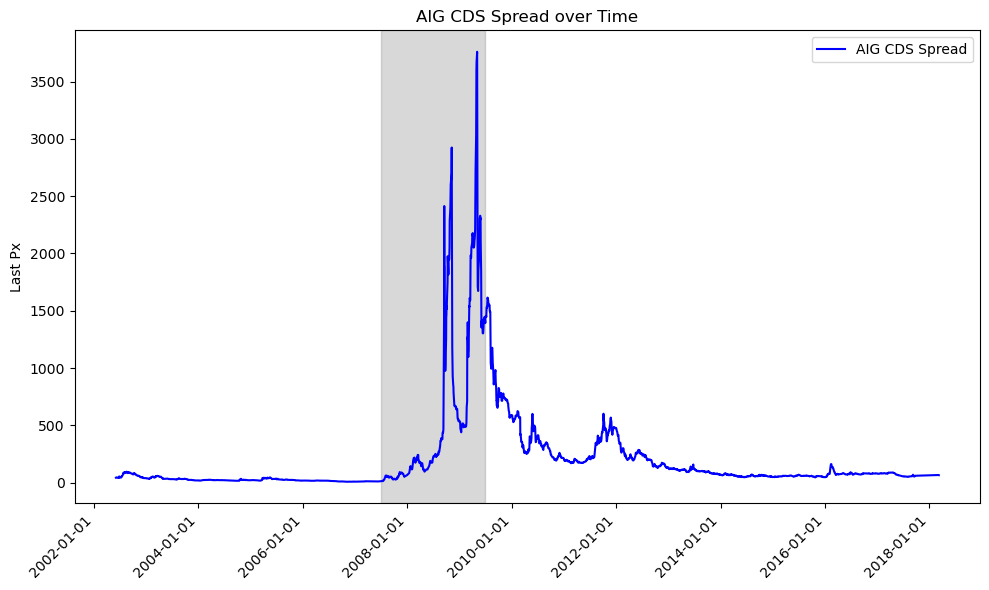

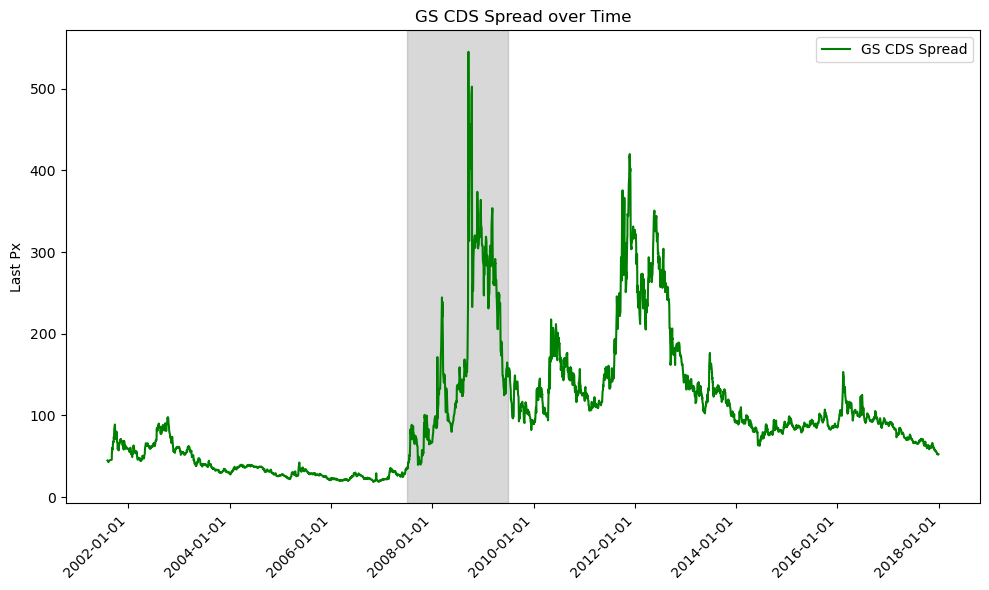

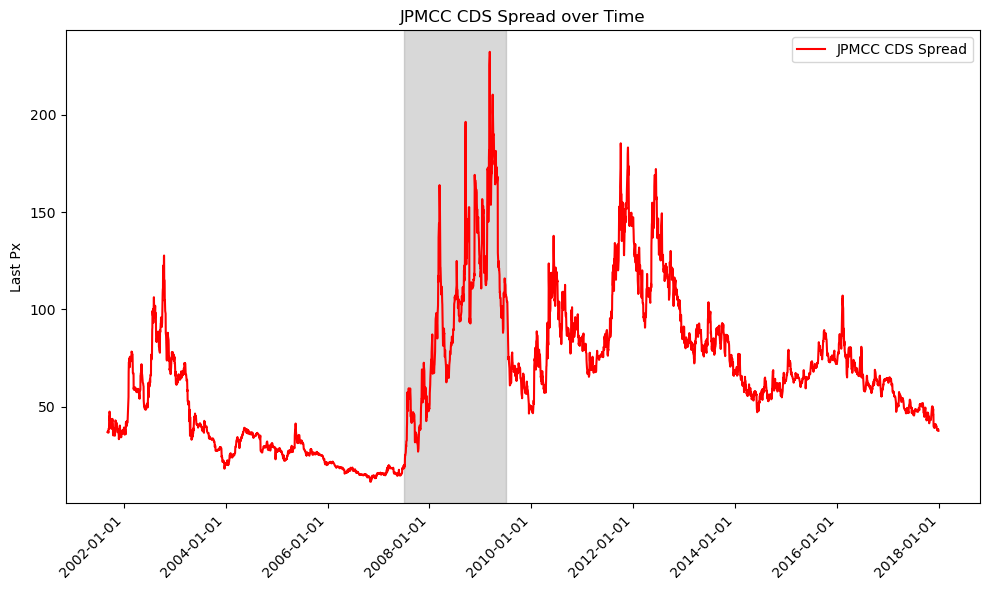

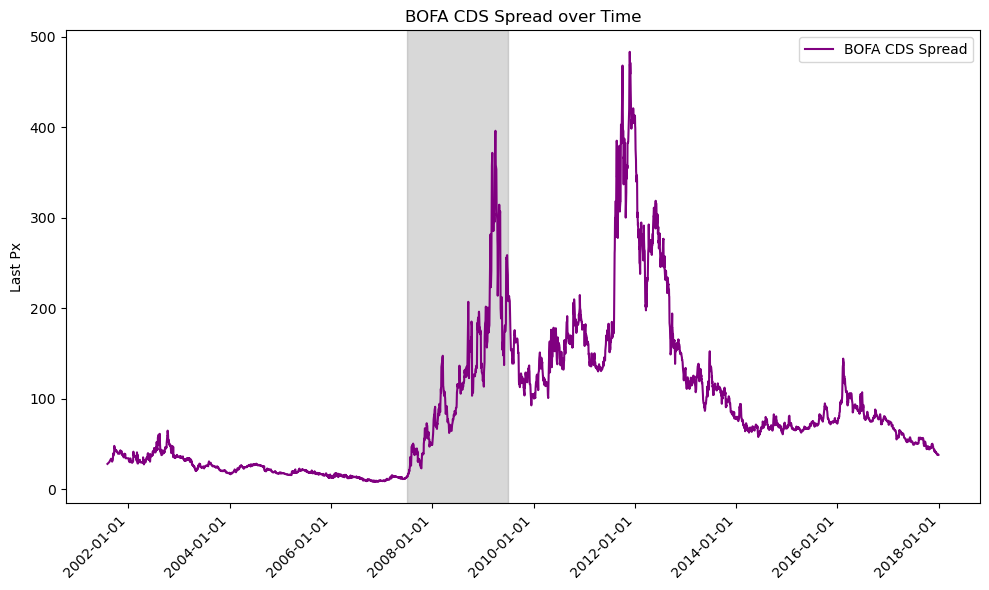

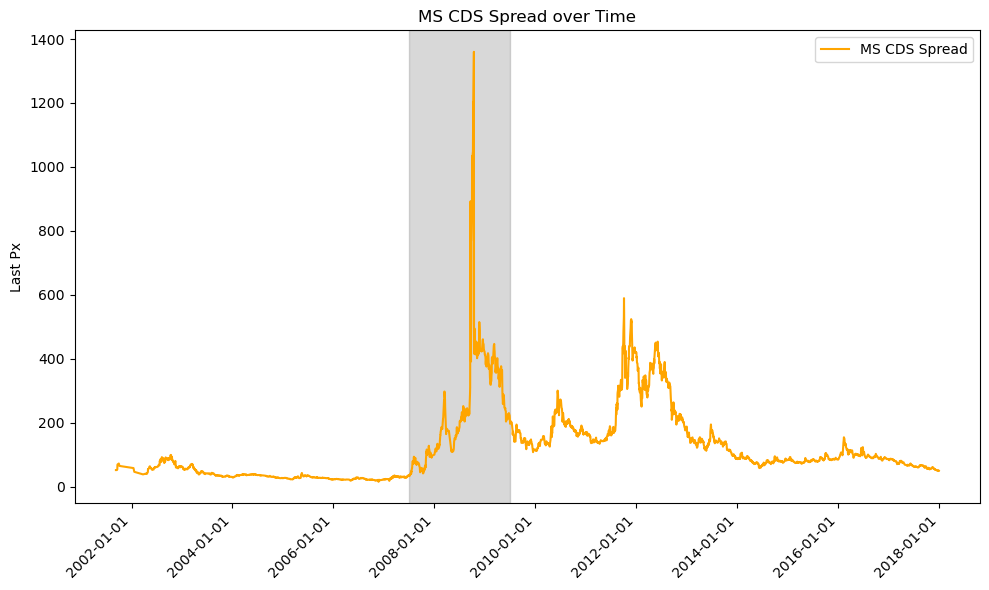

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



date_format = mdates.DateFormatter('%Y-%m-%d')
companies = ['AIG', 'GS', 'JPMCC', 'BOFA', 'MS']
colors = ['blue', 'green', 'red', 'purple', 'orange']
crisis_start = pd.to_datetime('2007-07-01')
crisis_end = pd.to_datetime('2009-06-30')

for i, company in enumerate(companies):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    date_col_index = data1.columns.get_loc(f"{company} CDS USD SR 5Y D14 Corp")
    price_col_index = date_col_index + 1
    
    company_dates = pd.to_datetime(data1.iloc[:, date_col_index])
    company_prices = pd.to_numeric(data1.iloc[:, price_col_index], errors='coerce')
    
    ax.plot(company_dates, company_prices, color=colors[i], label=f"{company} CDS Spread")
    ax.set_title(f"{company} CDS Spread over Time")
    ax.set_ylabel('Last Px')
    ax.legend()
    ax.xaxis.set_major_formatter(date_format)

    # 标记金融危机期间的阴影
    ax.axvspan(crisis_start, crisis_end, color='grey', alpha=0.3)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


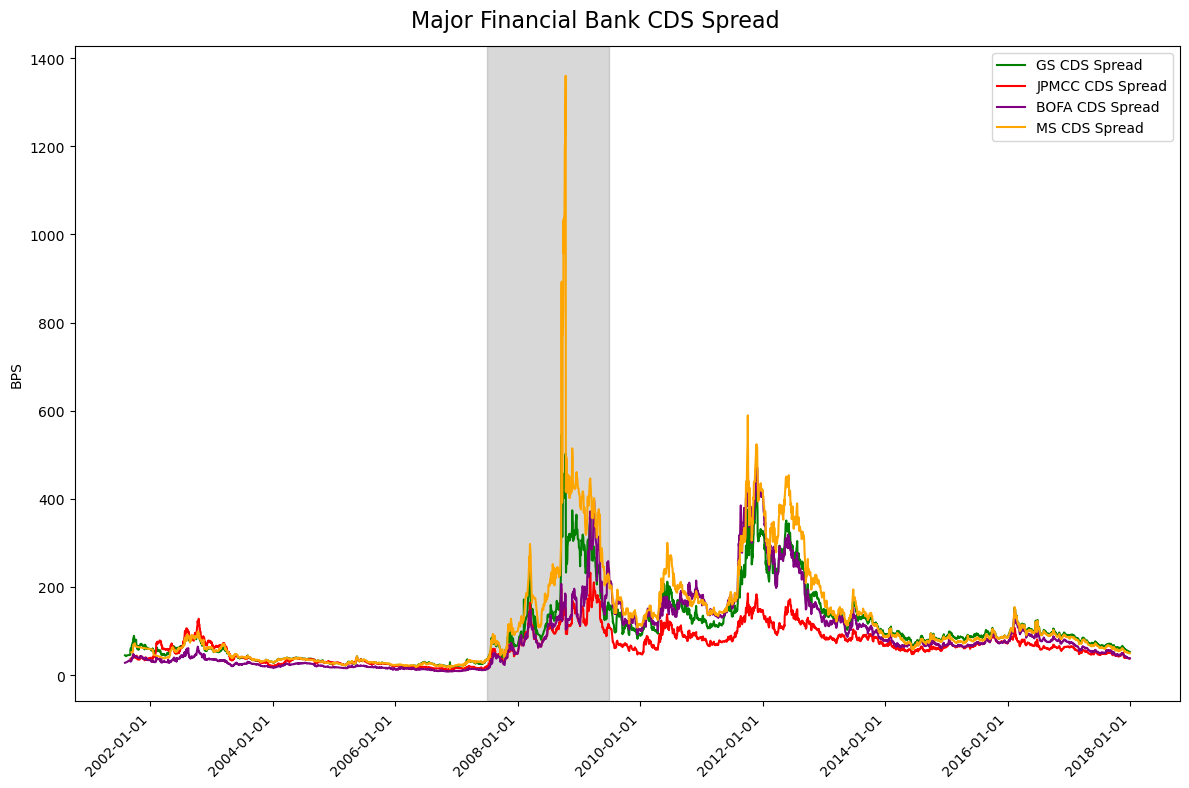

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# 设置图形
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Major Financial Bank CDS Spread', fontsize=16)

date_format = mdates.DateFormatter('%Y-%m-%d')
companies = [ 'GS', 'JPMCC', 'BOFA', 'MS']
colors = [ 'green', 'red', 'purple', 'orange']
crisis_start = pd.to_datetime('2007-07-01')
crisis_end = pd.to_datetime('2009-06-30')

for i, company in enumerate(companies):
    date_col_index = data1.columns.get_loc(f"{company} CDS USD SR 5Y D14 Corp")
    price_col_index = date_col_index + 1
    
    company_dates = pd.to_datetime(data1.iloc[:, date_col_index])
    company_prices = pd.to_numeric(data1.iloc[:, price_col_index], errors='coerce')
    
    ax.plot(company_dates, company_prices, color=colors[i], label=f"{company} CDS Spread")

ax.set_ylabel('BPS')
ax.legend()
ax.xaxis.set_major_formatter(date_format)

# 标记金融危机期间的阴影
ax.axvspan(crisis_start, crisis_end, color='grey', alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

